<a href="https://colab.research.google.com/github/FreMeli/ASE_1/blob/main/EDO_MUJ_LIMPIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Vamos a cargar y leer 2 archivos:
  1. pob_ini_proyecciones.csv --> Contiene el total de la población por años. Fuente: CONAPO 
  2. INEGI_exporta_12_4_2023_8_47_22.xls --> Contiene el número de homicidios para hombres y mujeres por año y por estado. Fuente:INEGI

In [1]:
import pandas as pd
import numpy as np

from google.colab import files 
import io
upload = files.upload()

Saving pob_ini_proyecciones.csv to pob_ini_proyecciones.csv
Saving INEGI_exporta_12_4_2023_8_47_22.xls to INEGI_exporta_12_4_2023_8_47_22.xls


In [ ]:
#upload1 = files.upload()

Saving INEGI_exporta_12_4_2023_8_47_22.xls to INEGI_exporta_12_4_2023_8_47_22.xls


In [2]:
df_P=pd.read_csv(io.BytesIO(upload["pob_ini_proyecciones.csv"]), header=0, encoding="ISO-8859-1")
df_P #Para ver las primeras 10 filas

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
0,1,1950,República Mexicana,0,0,Hombres,564510
1,2,1950,República Mexicana,0,0,Mujeres,552054
2,3,1950,República Mexicana,0,1,Hombres,505655
3,4,1950,República Mexicana,0,1,Mujeres,496559
4,5,1950,República Mexicana,0,2,Hombres,470139
...,...,...,...,...,...,...,...
599715,599716,2051,Zacatecas,32,107,Mujeres,4
599716,599717,2051,Zacatecas,32,108,Hombres,1
599717,599718,2051,Zacatecas,32,108,Mujeres,2
599718,599719,2051,Zacatecas,32,109,Hombres,0


In [ ]:
df_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599720 entries, 0 to 599719
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   RENGLON    599720 non-null  int64 
 1   AÑO        599720 non-null  int64 
 2   ENTIDAD    599720 non-null  object
 3   CVE_GEO    599720 non-null  int64 
 4   EDAD       599720 non-null  int64 
 5   SEXO       599720 non-null  object
 6   POBLACION  599720 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 32.0+ MB


In [3]:
df_Homicidios=pd.read_excel(io.BytesIO(upload["INEGI_exporta_12_4_2023_8_47_22.xls"]), header=0)#df con los datos de homicidio
df_Homicidios.head(10) #Para ver las primeras 10 filas

,AÑO,EDO,Hombre,Mujer,Total
0,2000,Total,9442,1284,10737
1,2000,Aguascalientes,13,4,17
2,2000,Baja California,408,32,440
3,2000,Baja California Sur,23,5,28
4,2000,Campeche,60,5,66
5,2000,Coahuila de Zaragoza,104,16,120
6,2000,Colima,48,9,57
7,2000,Chiapas,377,52,429
8,2000,Chihuahua,530,58,588
9,2000,Ciudad de México,815,109,924


In [ ]:
df_Homicidios

,AÑO,EDO,Hombre,Mujer,Total
0,2000,Total,9442,1284,10737
1,2000,Aguascalientes,13,4,17
2,2000,Baja California,408,32,440
3,2000,Baja California Sur,23,5,28
4,2000,Campeche,60,5,66
...,...,...,...,...,...
722,2021,Tlaxcala,131,29,160
723,2021,Veracruz de Ignacio de la Llave,812,109,922
724,2021,Yucatán,47,8,55
725,2021,Zacatecas,1578,171,1767


In [4]:
df_homicidios=df_Homicidios.copy()
df_homicidios.drop(columns=['Total'], inplace=True, axis=1)
df_homicidios

,AÑO,EDO,Hombre,Mujer
0,2000,Total,9442,1284
1,2000,Aguascalientes,13,4
2,2000,Baja California,408,32
3,2000,Baja California Sur,23,5
4,2000,Campeche,60,5
...,...,...,...,...
722,2021,Tlaxcala,131,29
723,2021,Veracruz de Ignacio de la Llave,812,109
724,2021,Yucatán,47,8
725,2021,Zacatecas,1578,171


In [5]:
df_homicidios.rename({'EDO': 'ENTIDAD', 'Hombre': 'HOMBRES','Mujer': 'MUJERES' }, axis=1, inplace=True)
df_homicidios

,AÑO,ENTIDAD,HOMBRES,MUJERES
0,2000,Total,9442,1284
1,2000,Aguascalientes,13,4
2,2000,Baja California,408,32
3,2000,Baja California Sur,23,5
4,2000,Campeche,60,5
...,...,...,...,...
722,2021,Tlaxcala,131,29
723,2021,Veracruz de Ignacio de la Llave,812,109
724,2021,Yucatán,47,8
725,2021,Zacatecas,1578,171


In [ ]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   AÑO      727 non-null    int64 
 1   ENTIDAD  727 non-null    object
 2   HOMBRES  727 non-null    int64 
 3   MUJERES  727 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 22.8+ KB


In [ ]:
df_homicidios.shape

(727, 4)

In [ ]:
#df_homicidios.to_excel('df_homicidios.xlsx', sheet_name='homicidios') #guardamos el df en un archivo tipo excel

In [ ]:
#df_homicidios.to_csv('df_homicidios.csv')

**NOTAS:**

    *df_Homicidios: INEGI con columna Total

    *df_homicidios: INEGI sin la colimuna Total

##Vamos a ordenar el df_P para poderlo usar


In [6]:
#Creamos un df_P1 que tendrá los datos desde el añoo 2000 hasta el 2021
df_P1 = df_P[df_P["AÑO"] >= 2000] 
df_P1 = df_P1[df_P1["AÑO"] <= 2021]
df_P1

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
11000,11001,2000,República Mexicana,0,0,Hombres,1161986
11001,11002,2000,República Mexicana,0,0,Mujeres,1120877
11002,11003,2000,República Mexicana,0,1,Hombres,1162710
11003,11004,2000,República Mexicana,0,1,Mujeres,1119109
11004,11005,2000,República Mexicana,0,2,Hombres,1165350
...,...,...,...,...,...,...,...
593115,593116,2021,Zacatecas,32,107,Mujeres,1
593116,593117,2021,Zacatecas,32,108,Hombres,0
593117,593118,2021,Zacatecas,32,108,Mujeres,0
593118,593119,2021,Zacatecas,32,109,Hombres,0


In [ ]:
#df_P1.to_excel('CONAPO_POB_Años.xlsx', sheet_name='POBLACION_Años') 
#df_P1.to_csv('CONAPO_POB_Años.csv')

In [7]:
columns = ["AÑO", "ENTIDAD", "HOMBRES", "MUJERES"] #Serán el nombre de nuestars columnas
mtrx = [] #Creamos una matriz vacía

for ano in df_P1["AÑO"].unique(): #Vamos a filtrar por año usando unique
  values_ano = df_P1[df_P1["AÑO"] == ano] 
  for estado in values_ano["ENTIDAD"].unique(): #Vamos a filtrar por estado usando unique
    tmp = [] #Este temporal nos irá guardando unen una lista los datos para ir formando un arreglo
    tmp.append(ano) #Añadimos al tmp el año, el primer elemento del tmp será el año
    tmp.append(estado)  #Añadimos al tmp el estado, el segundo elemento del tmp será el estado
    values_ano_entidad = values_ano[values_ano["ENTIDAD"] == estado]
    for sexo in values_ano_entidad["SEXO"].unique(): #Vamos a filtrar por estado usando unique
      #print("Analizando a: " + sexo + "...")
      values_ano_entidad_sexo = values_ano_entidad[values_ano_entidad["SEXO"] == sexo]
      poblacion = values_ano_entidad_sexo["POBLACION"].sum()#Sumamos para tener el total de la población de cada sexo
      tmp.append(poblacion)#Añadimos al tmp el sexo, el tercer elemento del tmp será Hombres y el cuarto Mujeres
    mtrx.append(tmp)#A la matriz le añadimos el arreglo. Ahora el ciclo se repetira para el siguiente año

array = np.array(mtrx) #Hacemos un array tipo numpy para después poderlo convertir en df
#df_Pob tendrá los datos del total de la población por sexo en el mismo orden que los datos del INEGI
df_Pob = pd.DataFrame(data = array, columns = columns) 
df_Pob


,AÑO,ENTIDAD,HOMBRES,MUJERES
0,2000,República Mexicana,48255807,49900635
1,2000,Aguascalientes,464024,488559
2,2000,Baja California,1247252,1211307
3,2000,Baja California Sur,219018,207555
4,2000,Campeche,350339,347621
...,...,...,...,...
721,2021,Tamaulipas,1812500,1852763
722,2021,Tlaxcala,676446,711366
723,2021,Veracruz,4156871,4408019
724,2021,Yucatán,1118236,1153344


In [ ]:
#df_Pob.to_excel('CONAPO_POB.xlsx', sheet_name='POBLACION') #guardamos el df en un archivo tipo excel

In [ ]:
#df_Pob.to_csv('CONAPO_POB.csv')

##Ahora vamos a juntar los dataframes en uno solo llamado df

In [8]:
df = df_homicidios.copy()
df=df.append(df_Pob, ignore_index=True )
df

<ipython-input-8-4b0024770edb>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_Pob, ignore_index=True )


,AÑO,ENTIDAD,HOMBRES,MUJERES
0,2000,Total,9442,1284
1,2000,Aguascalientes,13,4
2,2000,Baja California,408,32
3,2000,Baja California Sur,23,5
4,2000,Campeche,60,5
...,...,...,...,...
1448,2021,Tamaulipas,1812500,1852763
1449,2021,Tlaxcala,676446,711366
1450,2021,Veracruz,4156871,4408019
1451,2021,Yucatán,1118236,1153344


In [ ]:
#df.to_csv('df_edo_sexo.csv') #guardamos el df en un archivo tipo excel

In [ ]:
#df.to_excel('df_edo_sexo.xlsx', sheet_name='df_edo_sexo') #guardamos el df en un archivo tipo excel

##VAMOS A CALCULAR LA TASA NACIONAL DE HOMICIDIOS

Tasa x 100,000 habitantes= (No. Total de homicidios/Población total)*100,000

In [ ]:
df_Pob.iloc[0]['HOMBRES']

'48255807'

In [ ]:
df_Pob.iloc[66]

AÑO                      2002
ENTIDAD    República Mexicana
HOMBRES              49470707
MUJERES              51325800
Name: 66, dtype: object

In [ ]:
df.iloc[0]

AÑO         2000
ENTIDAD    Total
HOMBRES     9442
MUJERES     1284
Name: 0, dtype: object

In [9]:
Homicidios_H=[]
Homicidios_M=[]
tasas_H=[]
tasas_M=[]
for i in range(0,len(df_homicidios)-33,33):
  Homicidios_H.append(df.iloc[i]['HOMBRES'])
  Homicidios_M.append(df.iloc[i]['MUJERES'])
  tasas_H.append( (df.iloc[i]['HOMBRES']/float(df_Pob.iloc[i]['HOMBRES']) )*100000 )
  tasas_M.append((df.iloc[i]['MUJERES']/float(df_Pob.iloc[i]['MUJERES']))*100000)

In [10]:
import matplotlib.pyplot as plt

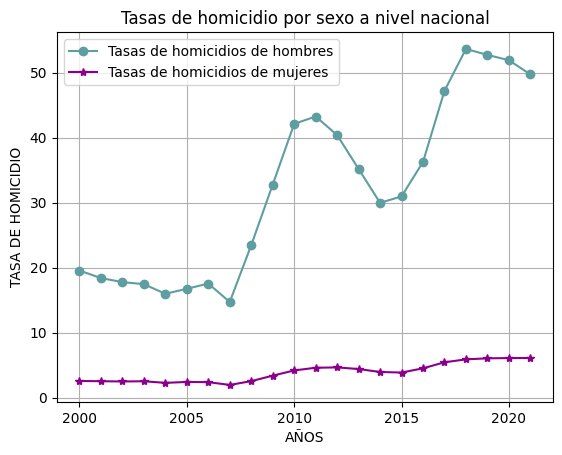

<Figure size 640x480 with 0 Axes>

In [11]:
years=list(range(2000, 2022))
plt.plot(years,tasas_H, label='Tasas de homicidios de hombres', color='#5F9EA0', marker='o')
plt.plot(years, tasas_M, label='Tasas de homicidios de mujeres', color='#8B008B', marker='*')
plt.xlabel('AÑOS')#Nombre del eje
plt.ylabel('TASA DE HOMICIDIO')
plt.title('Tasas de homicidio por sexo a nivel nacional') #Título del gráfico
plt.grid(True) #Para que se marquen los cuadritos
plt.legend() #Para que se visualicen las labels que establecimos arriba
plt.show()
plt.savefig("Tasas de homicidio por sexo a nivel nacional.png")

In [12]:
df_tasasH = pd.DataFrame(tasas_H, columns=['Tasas Hom'])
df_tasasM = pd.DataFrame(tasas_M, columns=['Tasas Muj'])

In [13]:
df_tasasM

,Tasas Muj
0,2.573114
1,2.534226
2,2.493872
3,2.527316
4,2.283039
5,2.421877
6,2.389298
7,1.964583
8,2.546142
9,3.388012


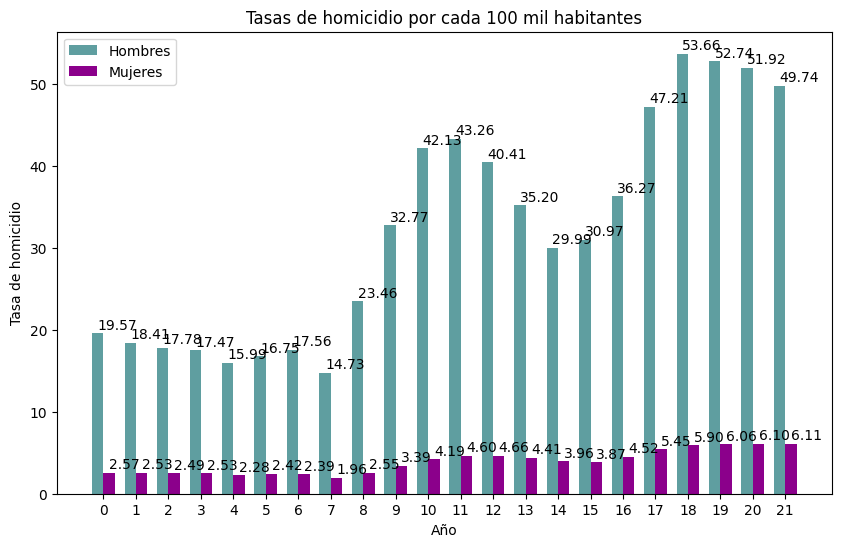

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir los valores para los ejes x e y para ambos DataFrames
x = np.arange(len(df_tasasM))
y_hom = df_tasasH['Tasas Hom']
y_muj = df_tasasM['Tasas Muj']

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Graficar las barras de hombres y mujeres en el mismo gráfico
width = 0.35
plt.bar(x - width/2, y_hom, width, label='Hombres', color='#5F9EA0')
plt.bar(x + width/2, y_muj, width, label='Mujeres', color='#8B008B')

# Configurar los ejes x e y
plt.xlabel('Año')
plt.ylabel('Tasa de homicidio')
plt.title('Tasas de homicidio por cada 100 mil habitantes')
plt.xticks(x, np.arange(0, 22, 1))

# Agregar leyenda
plt.legend()

for i in range(len(df_tasasM)):
    plt.text(x = x[i]-width/2 , y = y_hom[i]+0.5, s = "{:.2f}".format(y_hom[i]), size = 10)
    plt.text(x = x[i]+width/2 , y = y_muj[i]+0.5, s = "{:.2f}".format(y_muj[i]), size = 10)

# Mostrar el gráfico
plt.show()


In [14]:
tasas = pd.concat([df_tasasH, df_tasasM], axis=1)

In [15]:
tasas

,Tasas Hom,Tasas Muj
0,19.566557,2.573114
1,18.405173,2.534226
2,17.782240,2.493872
3,17.467122,2.527316
4,15.985377,2.283039
5,16.751474,2.421877
6,17.563165,2.389298
7,14.727894,1.964583
8,23.461008,2.546142
9,32.774035,3.388012


In [ ]:
tasas.describe()

,Tasas Hom,Tasas Muj
count,22.000000,22.000000
mean,32.180829,3.860629
std,13.796589,1.429262
min,14.727894,1.964583
25%,17.937973,2.529043
50%,31.870348,3.913578
75%,42.979527,4.646755
max,53.661448,6.106931


##Tasas de homicidio por Edo

In [16]:
#Tasas de homicidio por estado
Estados_Mu=[]
tasas_Mu=[]
temp_Mu=[]
for edo in range (1, 33,1):
  temp_Edo_Mu=[]
  for j in range(edo,len(df_homicidios),33):
    tasas_Mu.append( (df.iloc[j]['MUJERES']/float(df_Pob.iloc[j]['MUJERES']) )*100000 )
  Estados_Mu.append(tasas_Mu)
  tasas_Mu=[]
  temp_Mu=[]

print(len(Estados_Mu[0]))

22


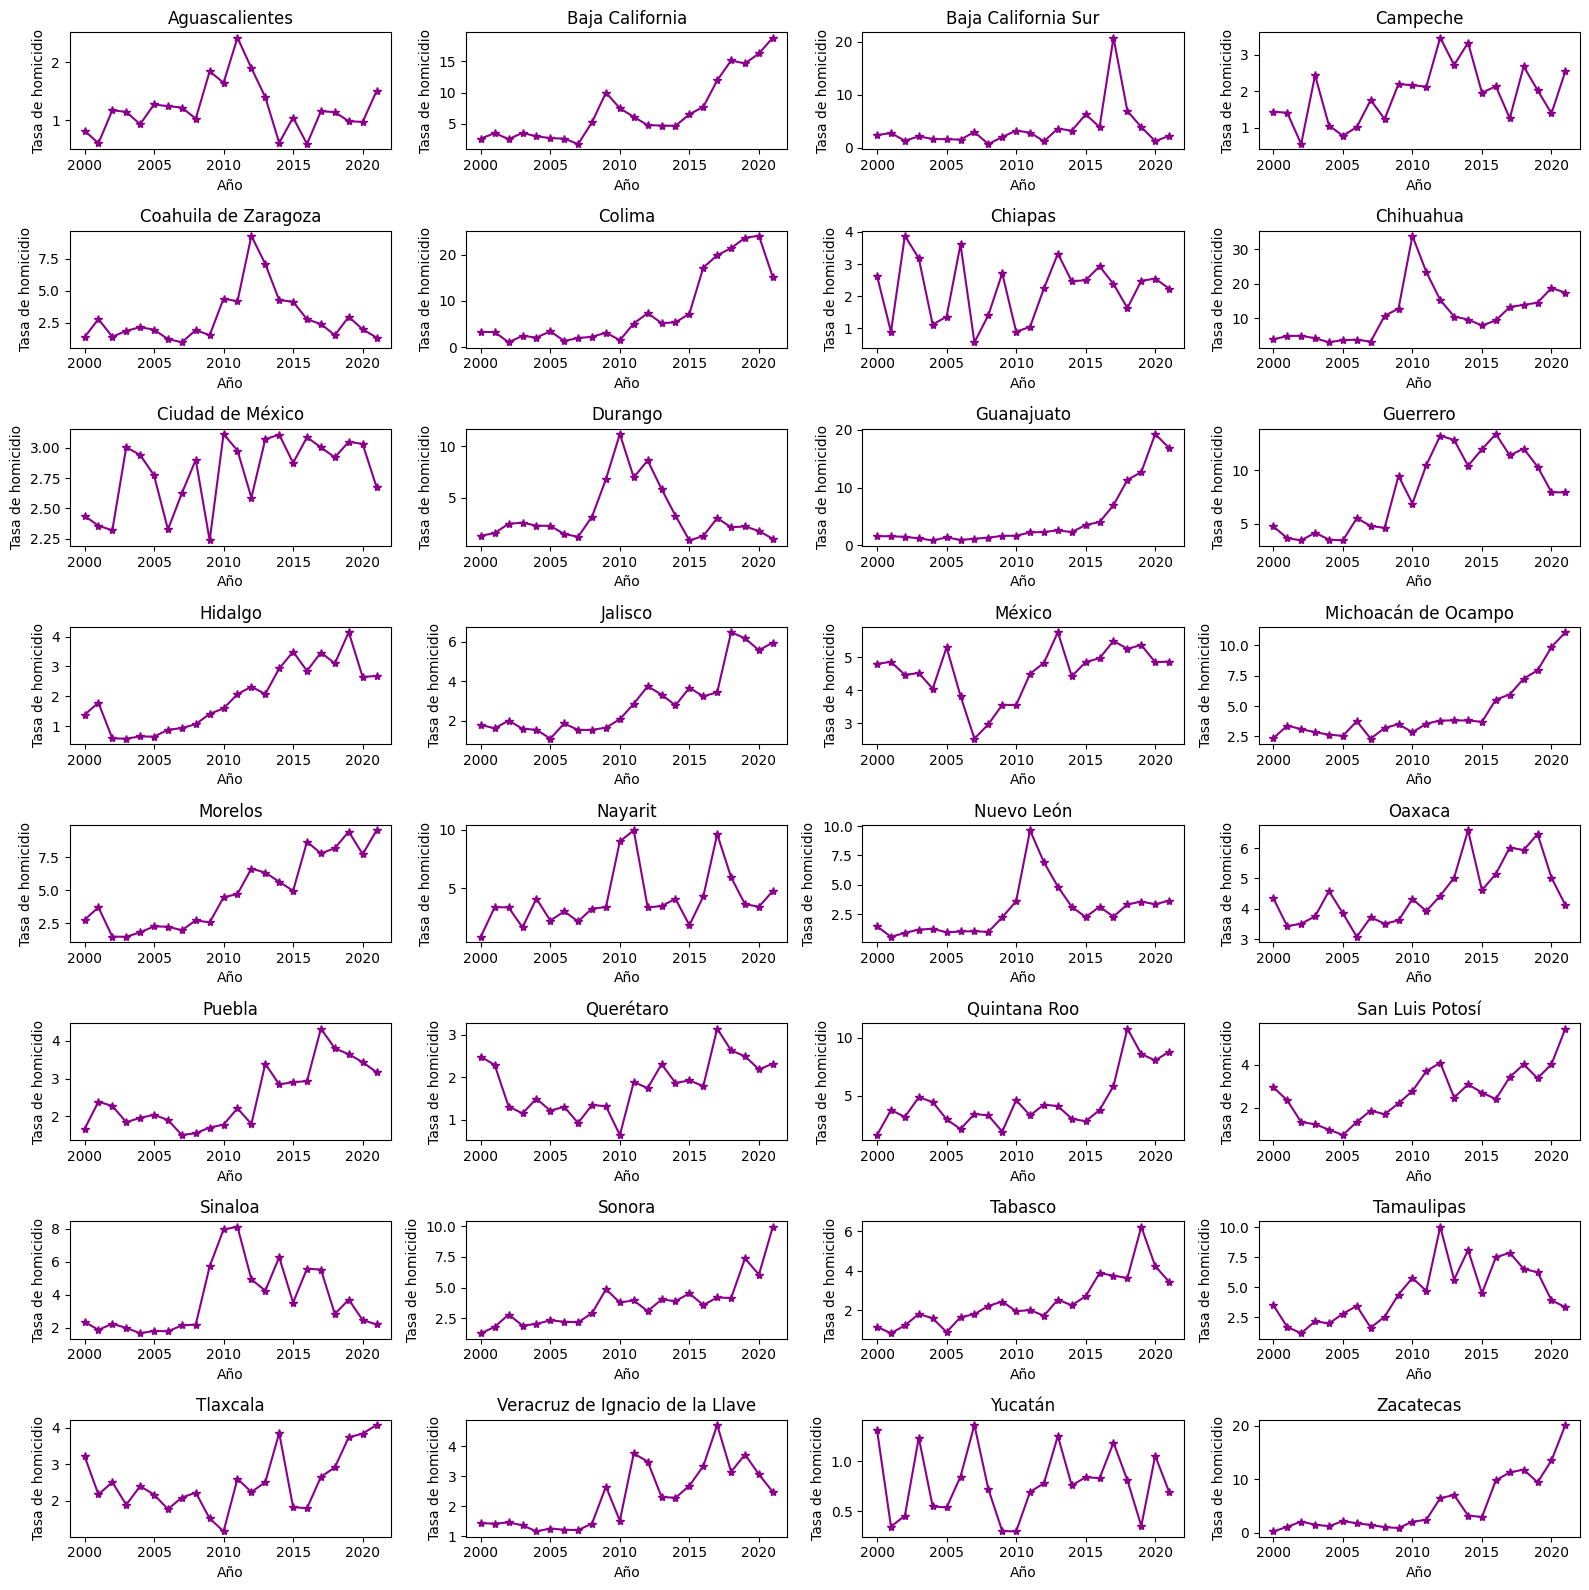

<Figure size 640x480 with 0 Axes>

In [18]:
# lista de los nombres de los 32 estados de la república mexicana
#states = ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila', 'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán', 'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas']
states = ['Aguascalientes','Baja California', 'Baja California Sur', 'Campeche', 'Coahuila de Zaragoza',
          'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo',
          'Jalisco', 'México', 'Michoacán de Ocampo', 'Morelos', 'Nayarit','Nuevo León', 'Oaxaca', 
          'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
          'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas']
# crear una figura y un conjunto de subtramas para cada estado
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(16, 16))
# iterar sobre cada subtrama y graficar las tasas de homicidio para cada estado
for i, ax in enumerate(axes.flatten()):
    # obtener las tasas de homicidio para el estado actual
    state_homicides = Estados_Mu[i]

    # crear una lista de años desde 2000 hasta 2021
    years = [year for year in range(2000, 2022)]

    # graficar las tasas de homicidio en función de los años
    ax.plot(years, state_homicides, color='#8B008B', marker='*')

    # establecer el título de la subtrama como el nombre del estado
    ax.set_title(states[i])

    # establecer las etiquetas de los ejes
    ax.set_xlabel("Año")
    ax.set_ylabel("Tasa de homicidio")

# ajustar el espaciado entre las subtramas
plt.tight_layout()

# mostrar el gráfico
plt.show()
plt.savefig("Tasas de homicidio de mujeres por estado.png")

In [19]:
df_EdosM = pd.DataFrame(Estados_Mu, columns=years)
df_EdosM #El índice representa el Estado 

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0.818734,0.599510,1.169844,1.141620,0.928555,1.269901,1.239917,1.217400,1.024006,1.842299,...,1.898197,1.395334,0.607927,1.043896,0.585742,1.154050,1.137326,0.981287,0.967947,1.501151
1,2.641775,3.529700,2.571143,3.558072,3.016906,2.720510,2.645996,1.772931,5.272706,9.995832,...,4.793676,4.733565,4.674157,6.538865,7.711047,11.943846,15.117167,14.640950,16.233451,18.762135
2,2.409000,2.789841,1.345841,2.165571,1.673528,1.618535,1.565111,2.985732,0.712433,2.042317,...,1.240583,3.623571,3.234866,6.307394,3.916106,20.755500,6.938699,3.914599,1.277071,2.251165
3,1.438348,1.410278,0.552656,2.436515,1.060926,0.780098,1.019075,1.758555,1.237869,2.195690,...,3.467262,2.717570,3.328540,1.958894,2.136392,1.258817,2.679882,2.026252,1.394839,2.548385
4,1.381269,2.797490,1.414124,1.877675,2.163588,1.967813,1.236442,0.987160,1.939128,1.538430,...,9.286918,7.089240,4.274763,4.151289,2.776929,2.409792,1.540521,2.974094,1.997097,1.354488
5,3.310856,3.268805,1.074799,2.474040,2.092130,3.442258,1.358373,1.985769,2.257074,3.141779,...,7.362599,5.195855,5.376588,7.220417,17.182412,19.840844,21.362788,23.618941,24.022857,15.104029
6,2.629226,0.891537,3.878651,3.180212,1.115459,1.366401,3.613358,0.567342,1.408266,2.712672,...,2.244574,3.323286,2.465506,2.496995,2.931624,2.379569,1.632517,2.481038,2.547273,2.238606
7,3.803850,4.783875,4.839436,4.140202,2.966638,3.595200,3.722760,3.153977,10.611994,12.734515,...,15.229585,10.433975,9.561112,7.828928,9.302239,13.199885,13.804905,14.454884,18.711869,17.337014
8,2.438119,2.356705,2.318697,3.005391,2.942413,2.773581,2.325529,2.625076,2.902186,2.234564,...,2.588876,3.072428,3.110467,2.876471,3.088965,3.005032,2.922020,3.051416,3.033416,2.676144
9,1.348996,1.601572,2.506755,2.608667,2.321272,2.296592,1.513869,1.246204,3.199012,6.803217,...,8.612583,5.850046,3.279141,0.892561,1.322033,3.053891,2.160252,2.247220,1.802771,1.051262


In [20]:
df_EdosM.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.236373,2.314026,2.126718,2.266235,2.087849,2.076518,2.116921,1.938828,2.467503,3.381015,...,4.780968,4.355289,3.984524,3.752994,4.794842,6.229644,6.100779,6.222687,6.173480,6.331482
std,1.150523,1.202528,1.148194,1.113610,1.122568,1.096651,1.114314,0.920621,1.853951,2.798214,...,3.438836,2.473532,2.225907,2.296591,3.642755,4.923810,4.775655,4.860862,5.909417,5.646568
min,0.284850,0.349517,0.456940,0.579803,0.549340,0.539142,0.846161,0.567342,0.712433,0.305545,...,0.780012,1.248938,0.607927,0.840473,0.585742,1.154050,0.808760,0.355074,0.967947,0.693635
25%,1.380336,1.541375,1.286526,1.424977,1.226794,1.243025,1.286324,1.239003,1.349528,1.690348,...,2.300830,2.582583,2.827923,2.435011,2.831874,3.041676,2.891845,3.295285,2.526882,2.433704
50%,2.065743,2.227505,2.053840,1.887095,1.875717,2.103826,1.784629,1.780512,2.198928,2.332562,...,3.774446,3.718035,3.258987,3.227771,3.674283,4.515697,4.082245,4.031089,3.879077,3.861043
75%,2.793087,3.396770,2.870094,2.885146,2.719276,2.733778,2.743613,2.209174,3.020158,3.569411,...,6.528256,5.307405,4.483501,4.544377,5.549554,7.818164,7.498162,8.111127,7.794058,8.991761
max,4.798108,4.859030,4.839436,4.883200,4.584350,5.298953,5.538172,4.813343,10.611994,12.734515,...,15.229585,12.845599,10.426482,11.974953,17.182412,20.755500,21.362788,23.618941,24.022857,20.100786


In [46]:
df_Min_M=pd.DataFrame(df_EdosM.min(), columns=['Tasas'])
nueva_columna1 = ['Zacatecas', 'Yucatán', 'Yucatán','Hidalgo', 'Yucatán', 'Yucatán', 'Yucatán', 'Chiapas', 'Baja California Sur',
                 'Yucatán', 'Yucatán', 'Yucatán', 'Yucatán', 'Yucatán', 'Aguascalientes', 'Yucatán', 'Aguascalientes', 'Aguascalientes', 
                 'Yucatán','Yucatán', 'Aguascalientes', 'Yucatán'] 
df_Min_M['EDO']= nueva_columna1
df_Min_M

,Tasas,EDO
2000,0.284850,Zacatecas
2001,0.349517,Yucatán
2002,0.456940,Yucatán
2003,0.579803,Hidalgo
2004,0.549340,Yucatán
2005,0.539142,Yucatán
2006,0.846161,Yucatán
2007,0.567342,Chiapas
2008,0.712433,Baja California Sur
2009,0.305545,Yucatán


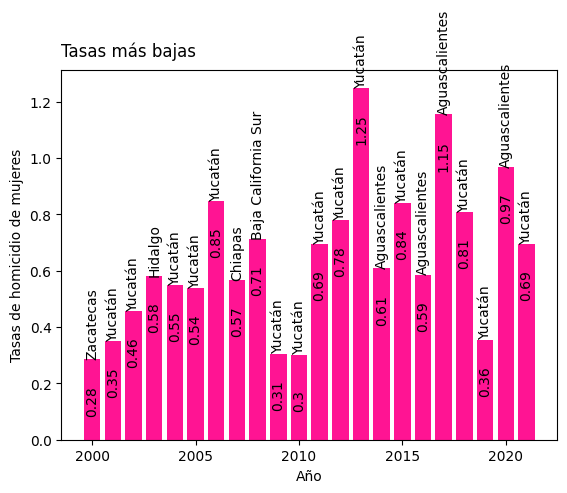

In [92]:
# Obtener los valores más altos de cada año
valores_minimos = df_EdosM.min()

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de barras
barras = ax.bar(valores_minimos.index, valores_minimos.values, color='#FF1493')

# Agregar etiquetas a las barras
for i, barra in enumerate(barras):
    ax.text(barra.get_x() + barra.get_width() / 2, barra.get_height()-0.2, round(valores_minimos.values[i], 2),
            ha='center', va='bottom', rotation=90)
    ax.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), df_Min_M.loc[df_Min_M['Tasas']==valores_minimos.values[i], 'EDO'].values[0],
            ha='center', va='bottom', rotation=90)
# Agregar etiquetas a las barras

# Agregar título y etiquetas de los ejes
ax.set_title('Tasas más bajas', loc='left', pad=10)
ax.set_xlabel('Año')
ax.set_ylabel('Tasas de homicidio de mujeres')

# Mostrar la gráfica
plt.show()

In [54]:
bajos_M= pd.DataFrame(df_EdosM.loc[31])
bajos_M

,31
2000,0.284850
2001,1.132928
2002,2.110456
2003,1.537778
2004,1.250201
2005,2.210018
2006,1.784472
2007,1.491206
2008,1.070574
2009,0.924768


In [55]:
bajos_M['Aguascalientes'] = pd.DataFrame(df_EdosM.loc[0])
bajos_M['Yucatán'] = pd.DataFrame(df_EdosM.loc[30])
bajos_M['Hidalgo'] = pd.DataFrame(df_EdosM.loc[12])
bajos_M['Zacatecas'] = pd.DataFrame(df_EdosM.loc[31])
bajos_M['Chiapas'] = pd.DataFrame(df_EdosM.loc[6])
bajos_M['Baja California Sur'] = pd.DataFrame(df_EdosM.loc[2])

,31,Aguascalientes,Yucatán,Hidalgo,Zacatecas,Chiapas,Baja California Sur
2000,0.284850,0.818734,1.306013,1.377537,0.284850,2.629226,2.409000
2001,1.132928,0.599510,0.349517,1.785872,1.132928,0.891537,2.789841
2002,2.110456,1.169844,0.456940,0.587490,2.110456,3.878651,1.345841
2003,1.537778,1.141620,1.232282,0.579803,1.537778,3.180212,2.165571
2004,1.250201,0.928555,0.549340,0.653954,1.250201,1.115459,1.673528
2005,2.210018,1.269901,0.539142,0.645786,2.210018,1.366401,1.618535
2006,1.784472,1.239917,0.846161,0.876286,1.784472,3.613358,1.565111
2007,1.491206,1.217400,1.358274,0.933990,1.491206,0.567342,2.985732
2008,1.070574,1.024006,0.722086,1.064169,1.070574,1.408266,0.712433
2009,0.924768,1.842299,0.305545,1.410559,0.924768,2.712672,2.042317


In [56]:
bajos_M = bajos_M.drop(31, axis=1)
bajos_M = bajos_M.reset_index()
bajos_M

,index,Aguascalientes,Yucatán,Hidalgo,Zacatecas,Chiapas,Baja California Sur
0,2000,0.818734,1.306013,1.377537,0.284850,2.629226,2.409000
1,2001,0.599510,0.349517,1.785872,1.132928,0.891537,2.789841
2,2002,1.169844,0.456940,0.587490,2.110456,3.878651,1.345841
3,2003,1.141620,1.232282,0.579803,1.537778,3.180212,2.165571
4,2004,0.928555,0.549340,0.653954,1.250201,1.115459,1.673528
5,2005,1.269901,0.539142,0.645786,2.210018,1.366401,1.618535
6,2006,1.239917,0.846161,0.876286,1.784472,3.613358,1.565111
7,2007,1.217400,1.358274,0.933990,1.491206,0.567342,2.985732
8,2008,1.024006,0.722086,1.064169,1.070574,1.408266,0.712433
9,2009,1.842299,0.305545,1.410559,0.924768,2.712672,2.042317


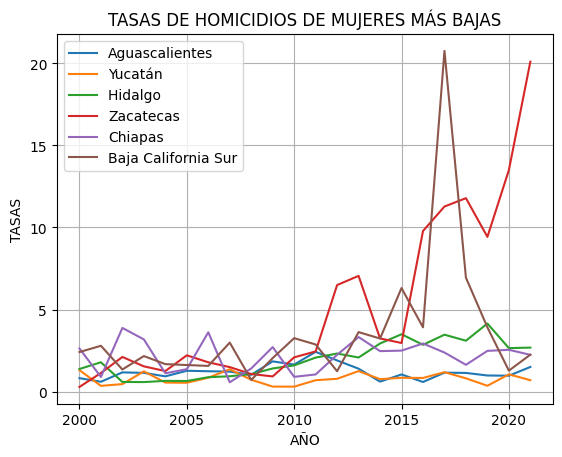

In [57]:
import matplotlib.pyplot as plt
plt.plot(bajos_M['index'], bajos_M['Aguascalientes'], label='Aguascalientes')
plt.plot(bajos_M['index'], bajos_M['Yucatán'], label='Yucatán ')
plt.plot(bajos_M['index'], bajos_M['Hidalgo'], label='Hidalgo ')
plt.plot(bajos_M['index'], bajos_M['Zacatecas'], label='Zacatecas')
plt.plot(bajos_M['index'], bajos_M['Chiapas'], label='Chiapas')
plt.plot(bajos_M['index'], bajos_M['Baja California Sur'], label='Baja California Sur')

plt.xlabel('AÑO')#Nombre del eje
plt.ylabel('TASAS')
plt.title('TASAS DE HOMICIDIOS DE MUJERES MÁS BAJAS') #Título del gráfico
plt.grid(True) #Para que se marquen los cuadritos
plt.legend() #Para que se visualicen las labels que establecimos arriba

###aHORA LOS MÁXIMOS

In [58]:
df_EdosM.max()

2000     4.798108
2001     4.859030
2002     4.839436
2003     4.883200
2004     4.584350
2005     5.298953
2006     5.538172
2007     4.813343
2008    10.611994
2009    12.734515
2010    33.814045
2011    23.337757
2012    15.229585
2013    12.845599
2014    10.426482
2015    11.974953
2016    17.182412
2017    20.755500
2018    21.362788
2019    23.618941
2020    24.022857
2021    20.100786
dtype: float64

In [80]:
df_EdosM[2021]

0      1.501151
1     18.762135
2      2.251165
3      2.548385
4      1.354488
5     15.104029
6      2.238606
7     17.337014
8      2.676144
9      1.051262
10    16.882124
11     7.937365
12     2.680318
13     5.951700
14     4.866578
15    11.095758
16     9.549933
17     4.778494
18     3.645422
19     4.118818
20     3.170598
21     2.316519
22     8.805703
23     5.705634
24     2.194701
25     9.965731
26     3.427441
27     3.346354
28     4.076664
29     2.472766
30     0.693635
31    20.100786
Name: 2021, dtype: float64

In [81]:
df_Max_M=pd.DataFrame(df_EdosM.max(), columns=['Tasas'])
nueva_columna = ['México', 'México', 'Chihuahua','Quintana Roo', 'Oaxaca', 'México', 'Guerrero', 'Guerrero', 'Chihuahua',
                 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Chihuahua', 'Guerrero', 'Guerrero', 'Guerrero', 'Colima', 'Baja California Sur',
                 'Colima','Colima', 'Colima', 'Zacatecas'] 
df_Max_M['EDO']= nueva_columna
df_Max_M

,Tasas,EDO
2000,4.798108,México
2001,4.859030,México
2002,4.839436,Chihuahua
2003,4.883200,Quintana Roo
2004,4.584350,Oaxaca
2005,5.298953,México
2006,5.538172,Guerrero
2007,4.813343,Guerrero
2008,10.611994,Chihuahua
2009,12.734515,Chihuahua


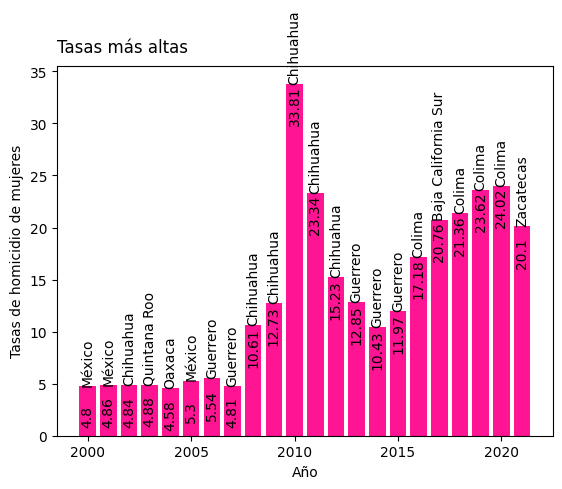

In [85]:
# Obtener los valores más altos de cada año
valores_maximos = df_EdosM.max()

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de barras
barras = ax.bar(valores_maximos.index, valores_maximos.values, color='#FF1493')

# Agregar etiquetas a las barras
for i, barra in enumerate(barras):
    ax.text(barra.get_x() + barra.get_width() / 2, barra.get_height()-4, round(valores_maximos.values[i], 2),
            ha='center', va='bottom', rotation=90)
    ax.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), df_Max_M.loc[df_Max_M['Tasas']==valores_maximos.values[i], 'EDO'].values[0],
            ha='center', va='bottom', rotation=90)
# Agregar etiquetas a las barras

# Agregar título y etiquetas de los ejes
ax.set_title('Tasas más altas', loc='left', pad=10)
ax.set_xlabel('Año')
ax.set_ylabel('Tasas de homicidio de mujeres')

# Mostrar la gráfica
plt.show()

0. 'Aguascalientes' 

1. 'Baja California' 

2. 'Baja California Sur'

3. 'Campeche': 
            
4. 'Coahuila de Zaragoza':

5. 'Colima':

6. 'Chiapas':

7. 'Chihuahua'
                    
8. 'Ciudad de México':

9. 'Durango': 

10. 'Guanajuato': 

11. 'Guerrero': 

12. 'Hidalgo': 

13. 'Jalisco':  
 
14. 'México':  

15. 'Michoacán de Ocampo':  

16. 'Morelos': 

17. 'Nayarit': 

18. 'Nuevo León':  

19. 'Oaxaca': 

20. 'Puebla': 

21. 'Querétaro':  
 
22. 'Quintana Roo': 

23. 'San Luis Potosí': 

24. 'Sinaloa': 

25. 'Sonora':  
26. 'Tabasco':
27. 'Tamaulipas':
28. 'Tlaxcala': 
29. 'Veracruz de Ignacio de la Llave'
30. 'Yucatán'
31. 'Zacatecas'

In [93]:
altos_M= pd.DataFrame(df_EdosM.loc[14])
altos_M['Estado de México'] = pd.DataFrame(df_EdosM.loc[14])
altos_M['Chihuahua'] = pd.DataFrame(df_EdosM.loc[7])
altos_M['Quintana Roo'] = pd.DataFrame(df_EdosM.loc[22])
altos_M['Oaxaca'] = pd.DataFrame(df_EdosM.loc[19])
altos_M['Guerrero'] = pd.DataFrame(df_EdosM.loc[11])
altos_M['Michoacán'] = pd.DataFrame(df_EdosM.loc[15])
altos_M['Colima'] = pd.DataFrame(df_EdosM.loc[5])
altos_M['Zacatecas'] = pd.DataFrame(df_EdosM.loc[31])
altos_M['Baja California Sur'] = pd.DataFrame(df_EdosM.loc[2])
altos_M

,14,Estado de México,Chihuahua,Quintana Roo,Oaxaca,Guerrero,Michoacán,Colima,Zacatecas,Baja California Sur
2000,4.798108,4.798108,3.803850,1.633869,4.346544,4.762907,2.350088,3.310856,0.284850,2.409000
2001,4.859030,4.859030,4.783875,3.788605,3.428913,3.674652,3.394086,3.268805,1.132928,2.789841
2002,4.462403,4.462403,4.839436,3.192508,3.509942,3.463420,3.094568,1.074799,2.110456,1.345841
2003,4.520953,4.520953,4.140202,4.883200,3.752572,4.176386,2.845065,2.474040,1.537778,2.165571
2004,4.041718,4.041718,2.966638,4.477888,4.584350,3.537675,2.644897,2.092130,1.250201,1.673528
2005,5.298953,5.298953,3.595200,2.985604,3.853278,3.454985,2.542038,3.442258,2.210018,1.618535
2006,3.823496,3.823496,3.722760,2.146418,3.078198,5.538172,3.751337,1.358373,1.784472,1.565111
2007,2.527311,2.527311,3.153977,3.447099,3.718831,4.813343,2.312664,1.985769,1.491206,2.985732
2008,2.962873,2.962873,10.611994,3.321514,3.513159,4.631687,3.192014,2.257074,1.070574,0.712433
2009,3.553153,3.553153,12.734515,1.921374,3.618187,9.486618,3.506639,3.141779,0.924768,2.042317


In [94]:
altos_M = altos_M.drop(14, axis=1)
altos_M = altos_M.reset_index()
altos_M

,index,Estado de México,Chihuahua,Quintana Roo,Oaxaca,Guerrero,Michoacán,Colima,Zacatecas,Baja California Sur
0,2000,4.798108,3.803850,1.633869,4.346544,4.762907,2.350088,3.310856,0.284850,2.409000
1,2001,4.859030,4.783875,3.788605,3.428913,3.674652,3.394086,3.268805,1.132928,2.789841
2,2002,4.462403,4.839436,3.192508,3.509942,3.463420,3.094568,1.074799,2.110456,1.345841
3,2003,4.520953,4.140202,4.883200,3.752572,4.176386,2.845065,2.474040,1.537778,2.165571
4,2004,4.041718,2.966638,4.477888,4.584350,3.537675,2.644897,2.092130,1.250201,1.673528
5,2005,5.298953,3.595200,2.985604,3.853278,3.454985,2.542038,3.442258,2.210018,1.618535
6,2006,3.823496,3.722760,2.146418,3.078198,5.538172,3.751337,1.358373,1.784472,1.565111
7,2007,2.527311,3.153977,3.447099,3.718831,4.813343,2.312664,1.985769,1.491206,2.985732
8,2008,2.962873,10.611994,3.321514,3.513159,4.631687,3.192014,2.257074,1.070574,0.712433
9,2009,3.553153,12.734515,1.921374,3.618187,9.486618,3.506639,3.141779,0.924768,2.042317


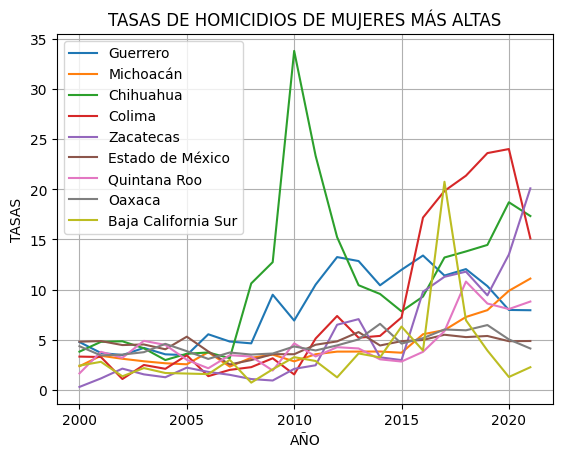

In [95]:
plt.plot(altos_M['index'], altos_M['Guerrero'], label='Guerrero')
plt.plot(altos_M['index'], altos_M['Michoacán'], label='Michoacán')
plt.plot(altos_M['index'], altos_M['Chihuahua'], label='Chihuahua')
plt.plot(altos_M['index'], altos_M['Colima'], label='Colima')
plt.plot(altos_M['index'], altos_M['Zacatecas'], label='Zacatecas')

plt.plot(altos_M['index'], altos_M['Estado de México'], label='Estado de México')
plt.plot(altos_M['index'], altos_M['Quintana Roo'], label='Quintana Roo')
plt.plot(altos_M['index'], altos_M['Oaxaca'], label='Oaxaca')
plt.plot(altos_M['index'], altos_M['Baja California Sur'], label='Baja California Sur')


plt.xlabel('AÑO')#Nombre del eje
plt.ylabel('TASAS')
plt.title('TASAS DE HOMICIDIOS DE MUJERES MÁS ALTAS') #Título del gráfico
plt.grid(True) #Para que se marquen los cuadritos
plt.legend() #Para que se visualicen las labels que establecimos arriba

In [96]:
from pandas.io.formats.style_render import Subset
df_EdosM.style.background_gradient(subset=[2000, 2001, 2002,2003, 2004,2005,2006,2007,2008,2009,2010,
                                              2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021], 
                                            cmap='BuPu')
#Estamos poniendo un gradiente de tal forma que el verde más oscuro es para los valores más grandes

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0.818734,0.599510,1.169844,1.141620,0.928555,1.269901,1.239917,1.217400,1.024006,1.842299,1.643993,2.423627,1.898197,1.395334,0.607927,1.043896,0.585742,1.154050,1.137326,0.981287,0.967947,1.501151
1,2.641775,3.529700,2.571143,3.558072,3.016906,2.720510,2.645996,1.772931,5.272706,9.995832,7.484283,6.121291,4.793676,4.733565,4.674157,6.538865,7.711047,11.943846,15.117167,14.640950,16.233451,18.762135
2,2.409000,2.789841,1.345841,2.165571,1.673528,1.618535,1.565111,2.985732,0.712433,2.042317,3.256449,2.870356,1.240583,3.623571,3.234866,6.307394,3.916106,20.755500,6.938699,3.914599,1.277071,2.251165
3,1.438348,1.410278,0.552656,2.436515,1.060926,0.780098,1.019075,1.758555,1.237869,2.195690,2.164060,2.126031,3.467262,2.717570,3.328540,1.958894,2.136392,1.258817,2.679882,2.026252,1.394839,2.548385
4,1.381269,2.797490,1.414124,1.877675,2.163588,1.967813,1.236442,0.987160,1.939128,1.538430,4.390628,4.184068,9.286918,7.089240,4.274763,4.151289,2.776929,2.409792,1.540521,2.974094,1.997097,1.354488
5,3.310856,3.268805,1.074799,2.474040,2.092130,3.442258,1.358373,1.985769,2.257074,3.141779,1.531384,5.114443,7.362599,5.195855,5.376588,7.220417,17.182412,19.840844,21.362788,23.618941,24.022857,15.104029
6,2.629226,0.891537,3.878651,3.180212,1.115459,1.366401,3.613358,0.567342,1.408266,2.712672,0.898159,1.044526,2.244574,3.323286,2.465506,2.496995,2.931624,2.379569,1.632517,2.481038,2.547273,2.238606
7,3.803850,4.783875,4.839436,4.140202,2.966638,3.595200,3.722760,3.153977,10.611994,12.734515,33.814045,23.337757,15.229585,10.433975,9.561112,7.828928,9.302239,13.199885,13.804905,14.454884,18.711869,17.337014
8,2.438119,2.356705,2.318697,3.005391,2.942413,2.773581,2.325529,2.625076,2.902186,2.234564,3.115423,2.978546,2.588876,3.072428,3.110467,2.876471,3.088965,3.005032,2.922020,3.051416,3.033416,2.676144
9,1.348996,1.601572,2.506755,2.608667,2.321272,2.296592,1.513869,1.246204,3.199012,6.803217,11.158291,6.975240,8.612583,5.850046,3.279141,0.892561,1.322033,3.053891,2.160252,2.247220,1.802771,1.051262
